In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from operator import sub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.special import boxcox1p
from scipy.stats import boxcox
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from yellowbrick.regressor import ResidualsPlot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('../data/rock_music.csv')
dataset.set_index('name', inplace=True)
dataset.head()

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1


In [3]:
dataset = dataset.apply(LabelEncoder().fit_transform).drop(['hit'], axis=1)

In [4]:
X = dataset.drop(['popularity'], axis = 1)
Y = dataset['popularity']

In [5]:
X_columns = X.columns

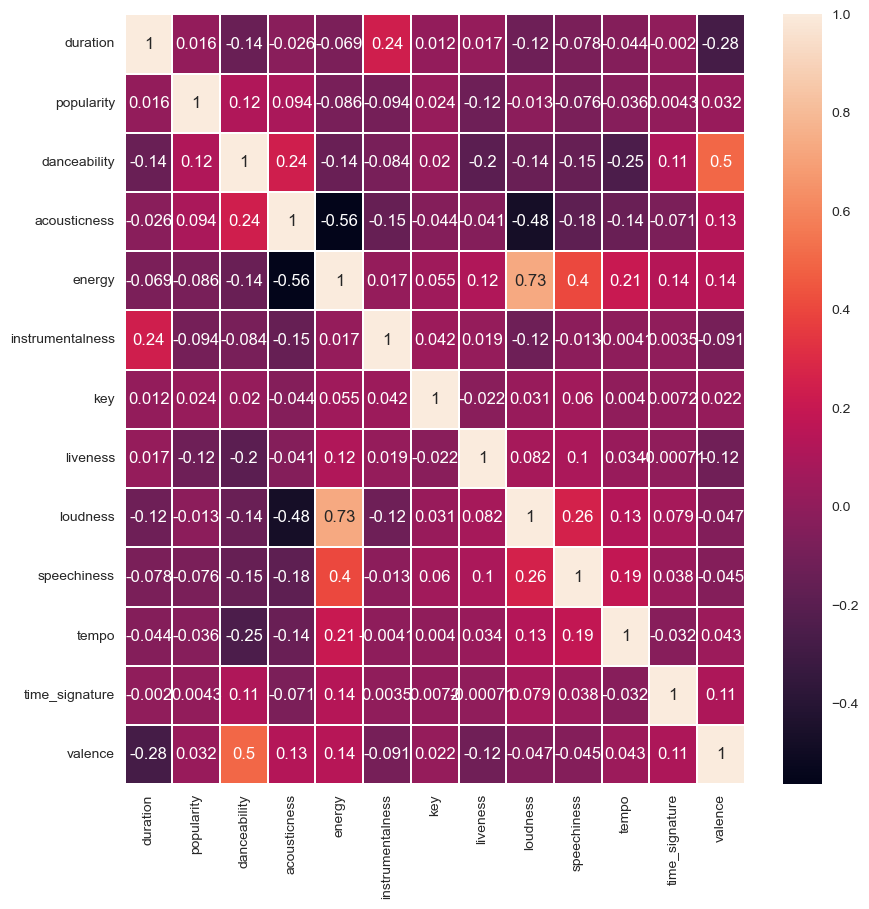

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[dataset.columns.drop(['artist', 'release_date'])].corr(), annot=True, linewidth = .10)
plt.show()

In [7]:
x = dataset[X_columns]
y = dataset['popularity']

In [8]:
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              3376.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        03:53:53   Log-Likelihood:                         -22758.
No. Observations:                5368   AIC:                                  4.554e+04
Df Residuals:                    5354   BIC:                                  4.564e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [9]:
X = MinMaxScaler().fit_transform(X)

In [10]:
pca = PCA().fit(X)

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21137475, 0.34353597, 0.45878678, 0.55760912, 0.65163886,
       0.73887473, 0.80485894, 0.84968591, 0.8920018 , 0.92923608,
       0.95892155, 0.98002727, 0.99270025, 1.        ])

In [12]:
pca.explained_variance_ratio_

array([0.21137475, 0.13216122, 0.11525081, 0.09882234, 0.09402975,
       0.08723586, 0.06598422, 0.04482696, 0.0423159 , 0.03723427,
       0.02968547, 0.02110572, 0.01267298, 0.00729975])

In [13]:
sum(pca.explained_variance_ratio_)

0.9999999999999998

In [14]:
pca = PCA(n_components = 14)
X_pca = pca.fit_transform(X)

In [15]:
results = sm.OLS(y, X_pca).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              4.853
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                    5.26e-09
Time:                        03:54:00   Log-Likelihood:                         -28858.
No. Observations:                5368   AIC:                                  5.774e+04
Df Residuals:                    5354   BIC:                                  5.784e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2)

&nbsp;

### Linear regression with PCA

In [17]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
result_df = pd.DataFrame({"actual":y_test,"predicted":y_pred})
result_df.head()

,actual,predicted
name,,
I Will Buy You A New Life,55,45.539665
Stargazer,59,47.529765
This Love,18,47.802936
Change,52,52.943888
Disease,42,49.018584


In [19]:
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))

MAE: 12.714753620843668
MSE: 251.11072865840904


<AxesSubplot:>

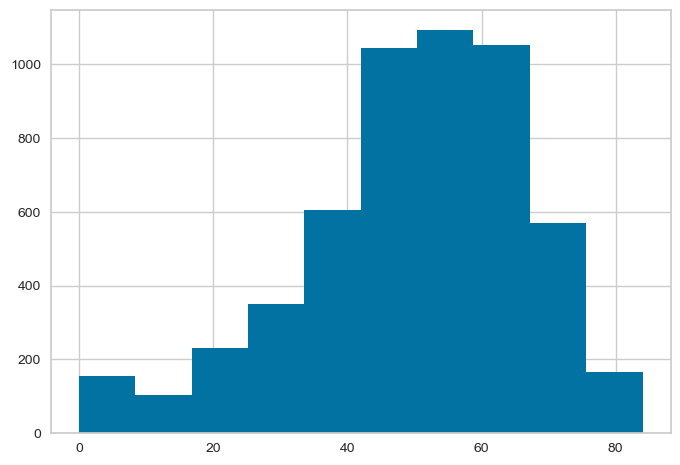

In [20]:
dataset['popularity'].hist()

In [60]:
data = dataset.copy()

In [64]:
from scipy.special import boxcox1p

data = data.apply(lambda x: boxcox1p(x, 1.5))

In [65]:
data['popularity'] = stats.boxcox(data['popularity'])[0]

ValueError: Data must be positive.

<AxesSubplot:>

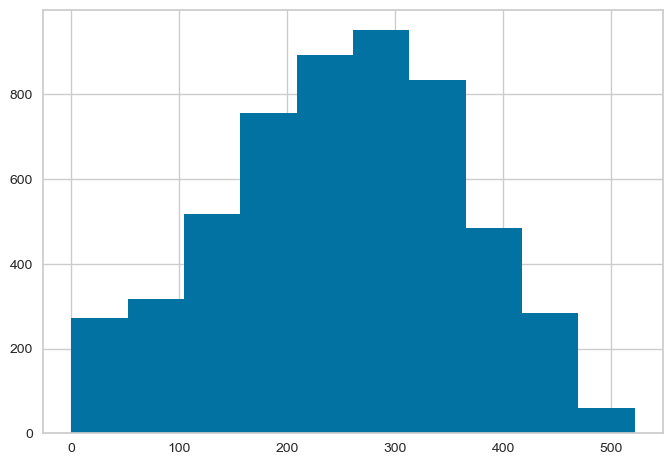

In [66]:
data['popularity'].hist()

In [67]:
x2 = data.drop(['popularity'], axis = 1)
y2 = data['popularity']

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.2)

In [69]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

&nbsp;

## Linear Regression

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
coeff_lr = pd.DataFrame(lr.coef_, x2.columns, columns=['Coefficient'])
coeff_lr

,Coefficient
artist,-0.665804
release_date,0.432274
duration,0.423665
danceability,-1.657705
acousticness,0.255014
energy,1.538952
instrumentalness,-0.988669
key,-0.695560
liveness,1.013765
loudness,-0.950059


In [75]:
result_df = pd.DataFrame({"actual":Y_test,"predicted":y_pred})
result_df.head()

,actual,predicted
name,,
Passive,293.809893,45.539665
Money,415.141516,47.529765
Letters To You,193.908654,47.802936
Going Underground,309.172001,52.943888
That Old Black Hole,167.988142,49.018584


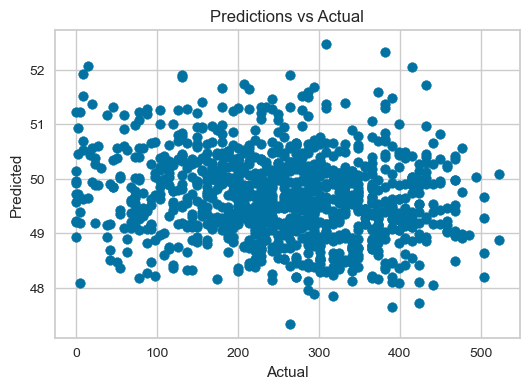

In [79]:
predictions = lr.predict(X_test)
plt.figure(figsize=(6,4))
plt.scatter(Y_test, predictions)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

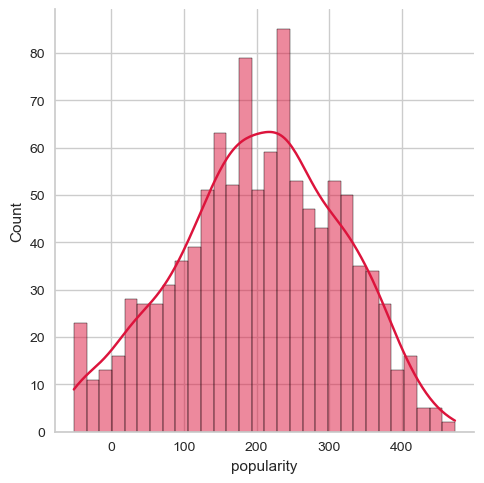

In [80]:
sns.displot((Y_test - predictions), bins=30, kde=True, color='crimson')
plt.show()

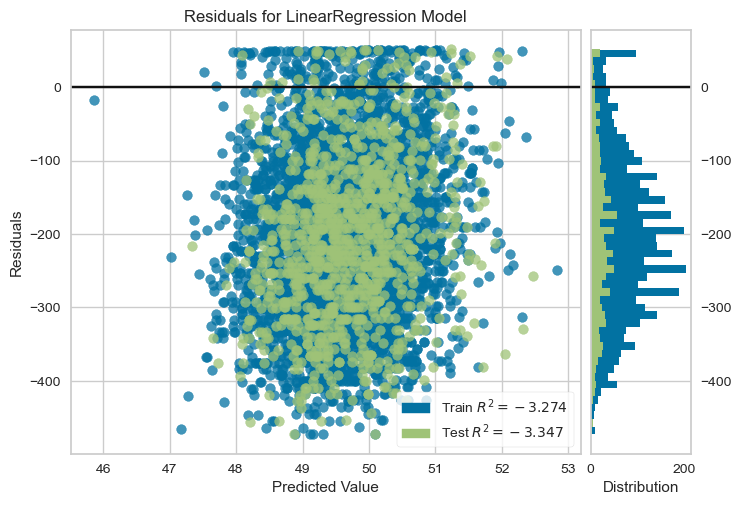

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [81]:
visualizer = ResidualsPlot(lr, hist=True, qqplot=False)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.show()

In [82]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(Y_test, predictions)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(Y_test, predictions)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, predictions))}')
print(f'\nR2 score: {metrics.r2_score(Y_test, predictions)}')

Mean Absolute Error(MAE): 206.2651249459299

Mean Squared Error(MSE): 53880.83883931088

Root Mean Square Error(RMSE): 232.12246517584393

R2 score: -3.347312626310875


&nbsp;

## Polynomial basis functions

In [83]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [84]:
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size = 0.2)

In [85]:
lr.fit(X_train_poly, Y_train_poly)
coeff_lr = pd.DataFrame(lr.coef_, columns=['Coefficient'])
coeff_lr

,Coefficient
0,3.216926e-15
1,1.373697e+01
2,1.137709e+01
3,1.296553e+01
4,-1.802889e+01
...,...
115,-4.690756e+00
116,-5.884739e+00
117,-1.149521e+01
118,-7.593293e+00


In [86]:
result_df = pd.DataFrame({"actual":Y_test_poly,"predicted":y_pred})
result_df.head()

,actual,predicted
name,,
2000 Light Years From Home - Remastered 2017 / Stereo,42,45.539665
Hey Tonight,49,47.529765
Block,34,47.802936
Twisting the Night Away,0,52.943888
War Machine,60,49.018584


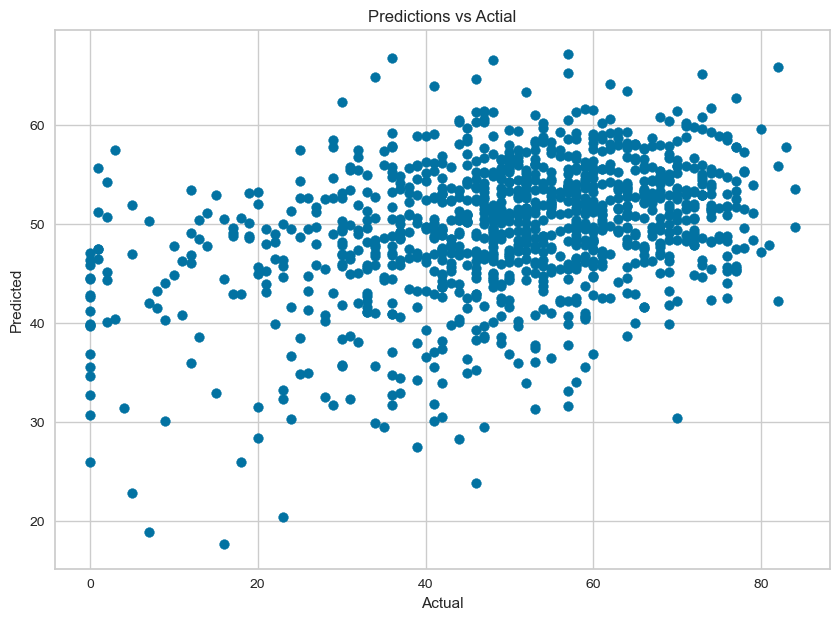

In [87]:
y_pred = lr.predict(X_test_poly)
plt.figure(figsize=(10,7))
plt.scatter(Y_test_poly, y_pred)
plt.title('Predictions vs Actial')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

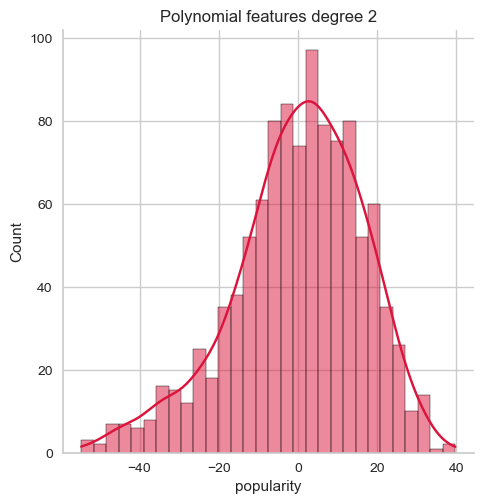

In [88]:
sns.displot((Y_test_poly - y_pred), bins=30, kde=True, color='crimson')
plt.title('Polynomial features degree 2')
plt.show()

In [89]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(Y_test_poly, y_pred)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(Y_test_poly, y_pred)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(Y_test_poly, y_pred))}')
print(f'\nR2 score: {metrics.r2_score(Y_test_poly, y_pred)}')

Mean Absolute Error(MAE): 12.89170172527681

Mean Squared Error(MSE): 268.7405170018589

Root Mean Square Error(RMSE): 16.39330707947176

R2 score: 0.1284627904661111


&nbsp;

## Lasso regression (L1 Regularization)

In [92]:
lasso = Lasso(alpha=0.05, random_state=0, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, max_iter=10000, random_state=0)

In [93]:
coeff_lasso = pd.DataFrame(lasso.coef_, X_columns, columns=['Coefficient'])
coeff_lasso

,Coefficient
artist,-0.110632
release_date,0.000000
duration,0.000000
danceability,-0.000000
acousticness,0.000000
energy,0.474109
instrumentalness,-0.347830
key,-0.166443
liveness,0.117414
loudness,0.000000


In [94]:
result_df = pd.DataFrame({"actual":Y_test,"predicted":y_pred})
result_df.head()

,actual,predicted
name,,
Passive,293.809893,49.416512
Money,415.141516,54.593726
Letters To You,193.908654,45.942285
Going Underground,309.172001,34.665385
That Old Black Hole,167.988142,44.786478


In [95]:
lasso_predicted = lasso.predict(X_test)

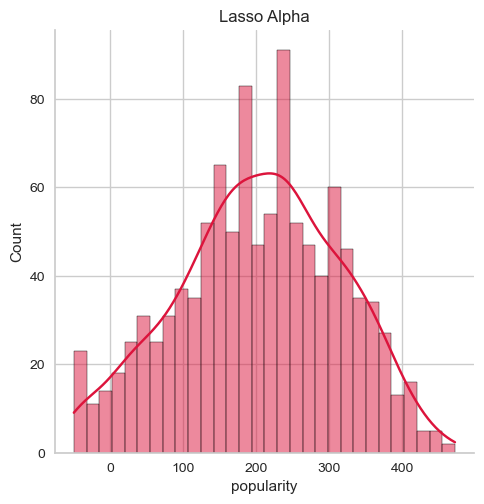

In [96]:
sns.displot((Y_test - lasso_predicted), bins=30, kde=True, color='crimson')
plt.title('Lasso Alpha')
plt.show()

In [97]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(Y_test, lasso_predicted)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(Y_test, lasso_predicted)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, lasso_predicted))}')
print(f'\nR2 score: {metrics.r2_score(Y_test, lasso_predicted)}')

Mean Absolute Error(MAE): 206.29457876940987

Mean Squared Error(MSE): 53880.969749461976

Root Mean Square Error(RMSE): 232.1227471607683

R2 score: -3.347323188643701


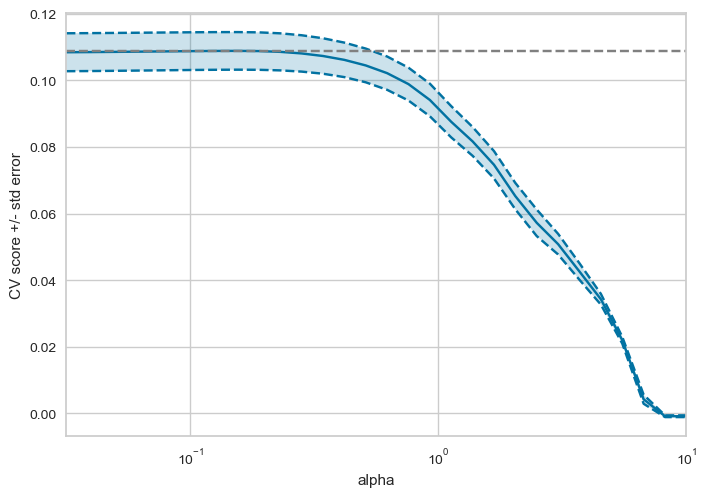

In [98]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-1.5, 1, 30)

parameters = [{'alpha': alphas}]
n_folds = 5

model = GridSearchCV(lasso, parameters, cv=n_folds, refit=False)
model.fit(X_train, Y_train)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

## Ridge regression (L2 Regularization)

In [31]:
ridge = Ridge(alpha=62.2, random_state=0, max_iter=10000)
ridge.fit(X_train, Y_train)

Ridge(alpha=62.2, max_iter=10000, random_state=0)

In [32]:
coeff_ridge = pd.DataFrame(ridge.coef_, X_columns, columns=['Coefficient'])
coeff_ridge

,Coefficient
artist,-0.127017
release_date,-5.371751
duration,0.837457
danceability,2.111692
acousticness,-0.428255
energy,-1.861620
instrumentalness,-1.216790
key,0.642878
liveness,-1.318921
loudness,3.550476


In [33]:
ridge_predicted = ridge.predict(X_test)

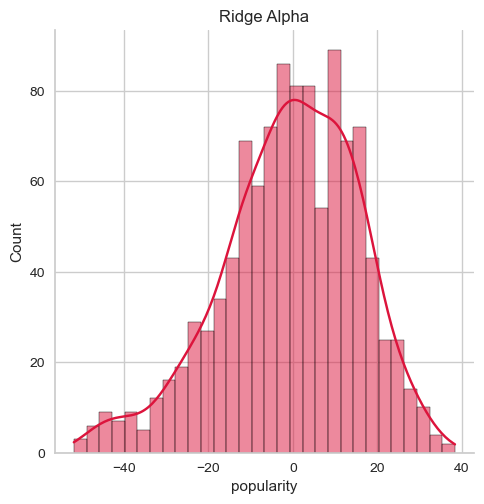

In [34]:
sns.displot((y_test - ridge_predicted), bins=30, kde=True, color='crimson')
plt.title('Ridge Alpha')
plt.show()

In [35]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, ridge_predicted)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(y_test, ridge_predicted)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, ridge_predicted))}')
print(f'\nR2 score: {metrics.r2_score(y_test, ridge_predicted)}')

Mean Absolute Error(MAE): 12.804556117700088

Mean Squared Error(MSE): 262.16578335953835

Root Mean Square Error(RMSE): 16.191534311470868

R2 score: 0.10099125089812022


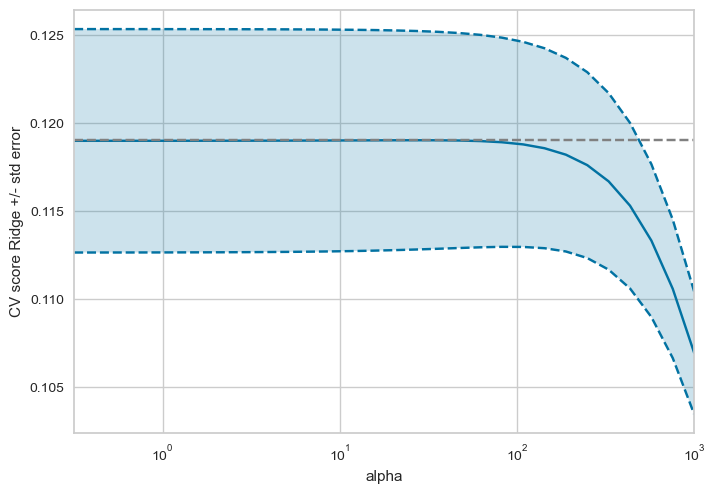

In [36]:
ridge = Ridge(random_state=0, max_iter=10000)
alphas = np.logspace(-0.5, 3, 30)

tuned_parameters = [{'alpha': alphas}]

model = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
model.fit(X_train, y_train)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score Ridge +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

&nbsp;

## Support Vector Regressor (SVR)

In [37]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    regressor = SVR(kernel=kernel, gamma='auto', tol=0.0001, C=0.001, epsilon=0.0001, 
                    shrinking=True, cache_size=200, verbose=False, max_iter=100)
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    
    print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
    print(f'Mean Squared Error(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
    print(f'Root Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
    print(f'R2: {metrics.r2_score(y_test, y_pred)}\n')

Mean Absolute Error(MAE): 17.225494948931747
Mean Squared Error(MSE): 418.1261222123319
Root Mean Square Error(RMSE): 20.448132487157157
R2: -0.4338219018513725

Mean Absolute Error(MAE): 17.22302761089804
Mean Squared Error(MSE): 418.1054363553388
Root Mean Square Error(RMSE): 20.447626668035067
R2: -0.4337509667118544

Mean Absolute Error(MAE): 17.224122458250566
Mean Squared Error(MSE): 418.1500607231665
Root Mean Square Error(RMSE): 20.448717825897216
R2: -0.43390399086544984



&nbsp;

## KNN

In [38]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [39]:
knn_predictions = knn.predict(X_test)

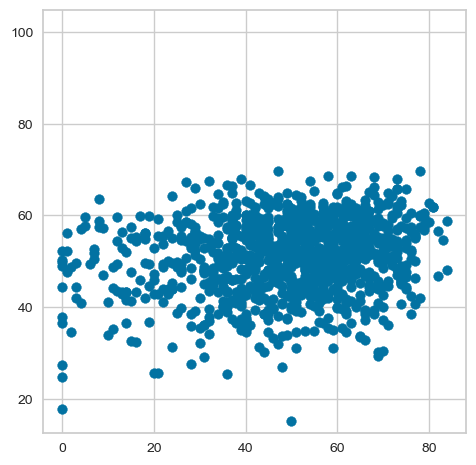

In [40]:
plt.scatter(y_test, knn_predictions)
plt.axis('square')
plt.show()

In [41]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, knn_predictions)}')
print(f'Mean Squared Error(MSE): {metrics.mean_squared_error(y_test, knn_predictions)}')
print(f'Root Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, knn_predictions))}')
print(f'R2: {metrics.r2_score(y_test, knn_predictions)}')

Mean Absolute Error(MAE): 13.810800744878957
Mean Squared Error(MSE): 309.0472253258846
Root Mean Square Error(RMSE): 17.579739057388895
R2: -0.05977277390391289
